In [1]:
import numpy as np
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_excel("RC_F28_10_2015_T29_10_2020.xlsx")

In [3]:
df.tail()

,nominal,data,curs,cdx
1228,1,2020-10-23,77.0809,Доллар США
1229,1,2020-10-24,76.4667,Доллар США
1230,1,2020-10-27,76.4443,Доллар США
1231,1,2020-10-28,76.4556,Доллар США
1232,1,2020-10-29,77.5520,Доллар США


In [4]:
closing_price = df.curs.values.astype("float32").reshape(-1, 1)

In [5]:
df.isna().any().any()

False

In [6]:
np.shape(closing_price)

(1233, 1)

In [7]:
def create_dataset(dataset, sequence_length):
    sequence_length += 1
    sequence_dataset = []
    for i in range(len(dataset)- sequence_length):
        sequence_dataset.append(dataset[i: i + sequence_length])
        
    sequence_dataset = np.array(sequence_dataset)
    data_x = sequence_dataset[:, :-1]
    data_y = sequence_dataset[:, -1]
    
    return data_x, data_y

scaler = MinMaxScaler()
scalers = scaler.fit(closing_price)
closing_price_scaled = scalers.transform(closing_price)


train_size = int(len(closing_price_scaled) * 0.85)
test_size = len(closing_price_scaled) - train_size
train, test = closing_price_scaled[0: train_size, :], closing_price_scaled[train_size:len(closing_price_scaled),:]

look_back = 10
x_train, y_train = create_dataset(train, look_back)
x_test, y_test =create_dataset(test, look_back)
        

In [8]:
model = Sequential()
model.add(LSTM(input_dim = 1, output_dim = 200, return_sequences = True))
model.add(Dropout(0.35))

model.add(LSTM(650,return_sequences = False))
model.add(Dropout(0.35))

model.add(Dense(output_dim = 1))
model.add(Activation('linear'))

model.compile(loss = 'mse', optimizer = 'rmsprop')

C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=200)`
  
C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [9]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 40, verbose = 2, validation_split = 0.2)

Train on 829 samples, validate on 208 samples
Epoch 1/40
 - 4s - loss: 0.0492 - val_loss: 0.0012
Epoch 2/40
 - 4s - loss: 0.0074 - val_loss: 7.3482e-04
Epoch 3/40
 - 3s - loss: 0.0082 - val_loss: 0.0058
Epoch 4/40
 - 3s - loss: 0.0078 - val_loss: 0.0122
Epoch 5/40
 - 3s - loss: 0.0049 - val_loss: 0.0028
Epoch 6/40
 - 3s - loss: 0.0072 - val_loss: 0.0019
Epoch 7/40
 - 3s - loss: 0.0045 - val_loss: 0.0082
Epoch 8/40
 - 4s - loss: 0.0068 - val_loss: 0.0011
Epoch 9/40
 - 4s - loss: 0.0020 - val_loss: 0.0041
Epoch 10/40
 - 3s - loss: 0.0066 - val_loss: 0.0095
Epoch 11/40
 - 4s - loss: 0.0049 - val_loss: 0.0053
Epoch 12/40
 - 3s - loss: 0.0037 - val_loss: 0.0036
Epoch 13/40
 - 3s - loss: 0.0048 - val_loss: 5.8413e-04
Epoch 14/40
 - 3s - loss: 0.0058 - val_loss: 3.7882e-04
Epoch 15/40
 - 3s - loss: 0.0035 - val_loss: 0.0014
Epoch 16/40
 - 3s - loss: 0.0031 - val_loss: 0.0027
Epoch 17/40
 - 3s - loss: 0.0046 - val_loss: 4.0663e-04
Epoch 18/40
 - 4s - loss: 0.0034 - val_loss: 0.0110
Epoch 19/40

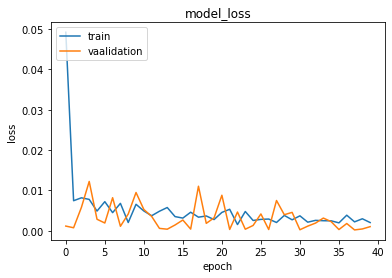

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'vaalidation'], loc ='upper left')
plt.show()

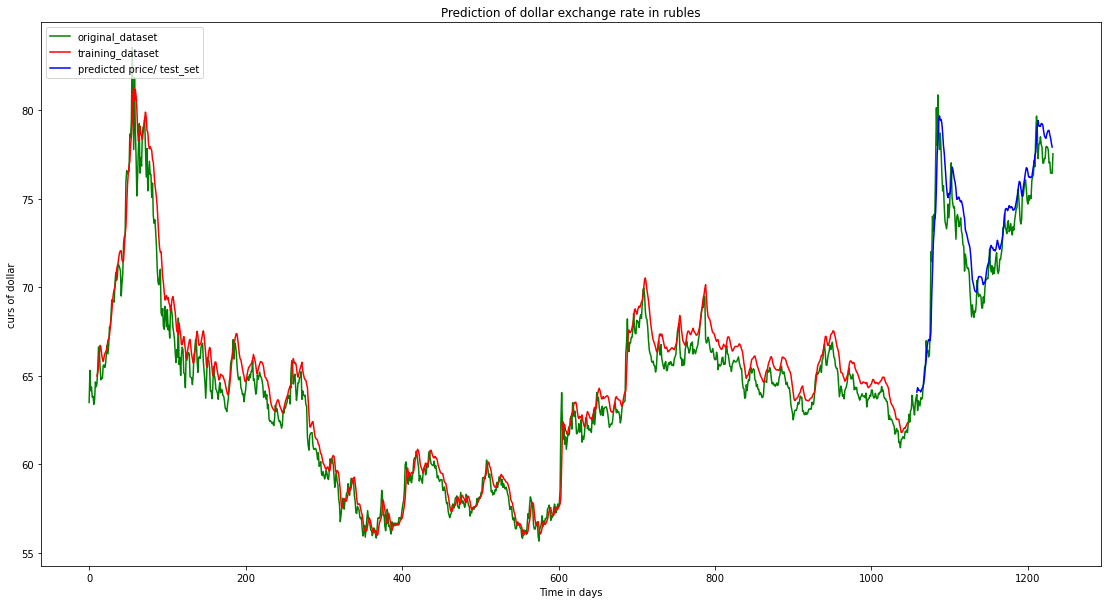

In [11]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict_unorm = scaler.inverse_transform(train_predict)
test_predict_unorm = scaler.inverse_transform(test_predict)


# creating similar dataset to plot training predictions

trainPredictPlot = np.empty_like(closing_price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_unorm)+look_back,:] = train_predict_unorm


#creating similar dataset tp plot tesing predictions


testPredictPlot = np.empty_like(closing_price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_unorm)+(look_back*2) + 1:len(closing_price)-1,:] = test_predict_unorm



plt.figure(figsize=(19, 10))
plt.plot(closing_price, 'g', label = 'original_dataset')
plt.plot(trainPredictPlot, 'r', label = 'training_dataset')
plt.plot(testPredictPlot, 'b', label = 'predicted price/ test_set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in days')
plt.ylabel('curs of dollar')
plt.title('Prediction of dollar exchange rate in rubles')
plt.show()




In [12]:
testPredictPlot

array([[     nan],
       [     nan],
       [     nan],
       ...,
       [78.14416],
       [77.93396],
       [     nan]], dtype=float32)

In [13]:
test_predict_unorm

array([[64.0895  ],
       [64.340065],
       [64.18476 ],
       [64.1972  ],
       [64.17813 ],
       [64.09977 ],
       [64.222595],
       [64.31452 ],
       [64.39645 ],
       [64.63573 ],
       [65.03806 ],
       [65.53735 ],
       [65.92036 ],
       [66.628876],
       [66.90153 ],
       [67.059364],
       [67.00719 ],
       [66.99746 ],
       [67.49299 ],
       [69.50484 ],
       [70.807724],
       [72.42552 ],
       [73.181145],
       [73.87255 ],
       [74.24581 ],
       [75.58657 ],
       [77.54923 ],
       [78.25493 ],
       [79.53223 ],
       [79.693405],
       [79.45084 ],
       [79.49377 ],
       [79.26841 ],
       [78.715775],
       [78.03004 ],
       [77.61001 ],
       [76.9581  ],
       [76.26246 ],
       [75.66181 ],
       [75.21666 ],
       [75.07261 ],
       [75.313934],
       [75.26679 ],
       [75.44664 ],
       [76.09062 ],
       [76.80458 ],
       [76.68516 ],
       [76.39879 ],
       [76.09476 ],
       [75.928116],
